# Imports

In [48]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Load the dataset

In [31]:
dataset_starbucks = "../dataset/starbucks-us.csv"

# Load the dataset
df = pd.read_csv(dataset_starbucks, sep = ',')

# Exploratory data analysis

In [32]:
df.head(3)

Brand                 Store Name Ownership Type        Street Address  \
0  Starbucks    Safeway-Anchorage #1809       Licensed  5600 Debarr Rd Ste 9   
1  Starbucks    Safeway-Anchorage #2628       Licensed        1725 Abbott Rd   
2  Starbucks  Safeway - Anchorage #1813       Licensed       1501 Huffman Rd   

        City State/Province  Phone Number  Longitude  Latitude  
0  Anchorage             AK  907-339-0900    -149.78     61.21  
1  Anchorage             AK  907-339-2800    -149.84     61.14  
2  Anchorage             AK  907-339-1300    -149.85     61.11

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13122 entries, 0 to 13121
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           13122 non-null  object 
 1   Store Name      13122 non-null  object 
 2   Ownership Type  13122 non-null  object 
 3   Street Address  13122 non-null  object 
 4   City            13122 non-null  object 
 5   State/Province  13122 non-null  object 
 6   Phone Number    13122 non-null  object 
 7   Longitude       13122 non-null  float64
 8   Latitude        13122 non-null  float64
dtypes: float64(2), object(7)
memory usage: 922.8+ KB


## Brand

In [46]:
df['Brand'].value_counts()

Starbucks                12829
Teavana                    290
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64

Starbucks has its main brand, and 3 others. We won't cluster by brand as it won't make any sense

## Ownership type

In [53]:
df['Ownership Type'].value_counts(normalize=True)

Company Owned    0.622771
Licensed         0.377229
Name: Ownership Type, dtype: float64

<AxesSubplot:xlabel='Ownership Type', ylabel='count'>

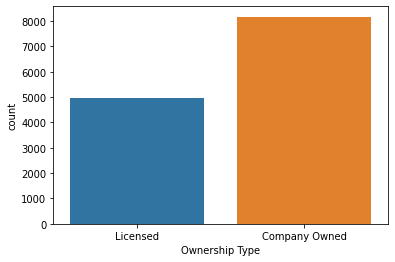

In [52]:
sns.countplot(x='Ownership Type', data=df)

The majority of the Starbucks are owned by the company (62%). However, a fair part of the stores are Licensed to private owner (nearly 40%).

## State/Province

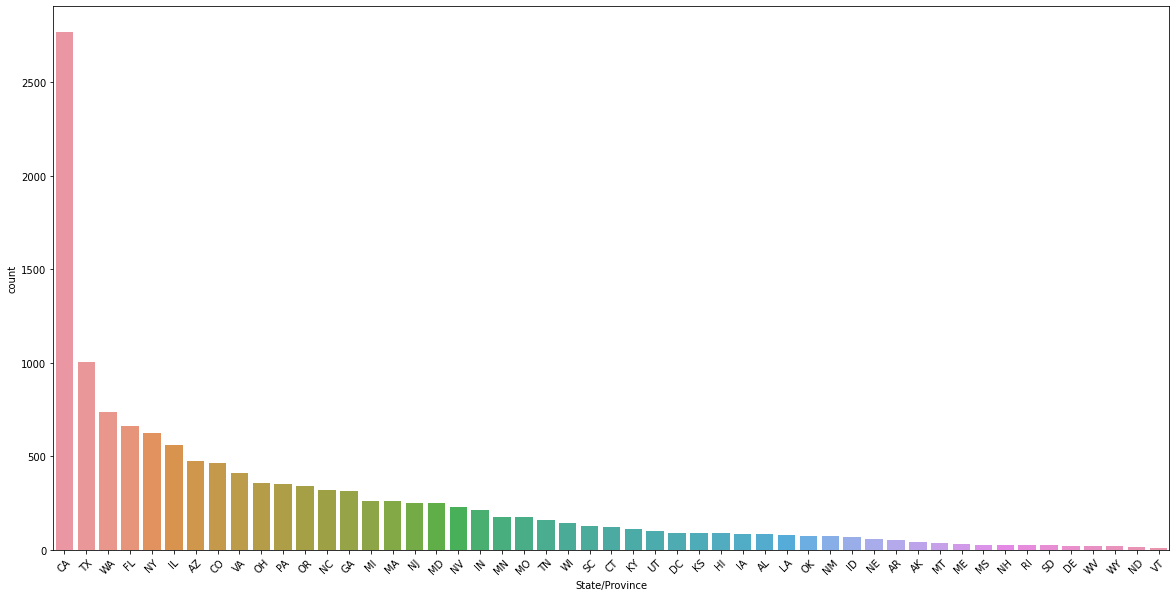

In [60]:
plt.figure(figsize=(20,10))

sns.countplot(x='State/Province', order = df['State/Province'].value_counts().index, data=df)
_ = plt.xticks(rotation=45)

The majority of the Starbucks are located in the states of **California**, **Texas**, **Washington**, **Florida**, **New York** and **Illinois**.

## City

In [67]:
len(df['City'].unique())

3163

Starbucks are located in 3163 uniques different cities. We'll plot only the 30 first one.

In [77]:
# Get the name of the 30 first cities
cities_names = df['City'].value_counts()[:30].index.tolist()

In [78]:
# Filter the dataset: take the 25 most populated cities
df_cities = df[df['City'].isin(cities_names)]

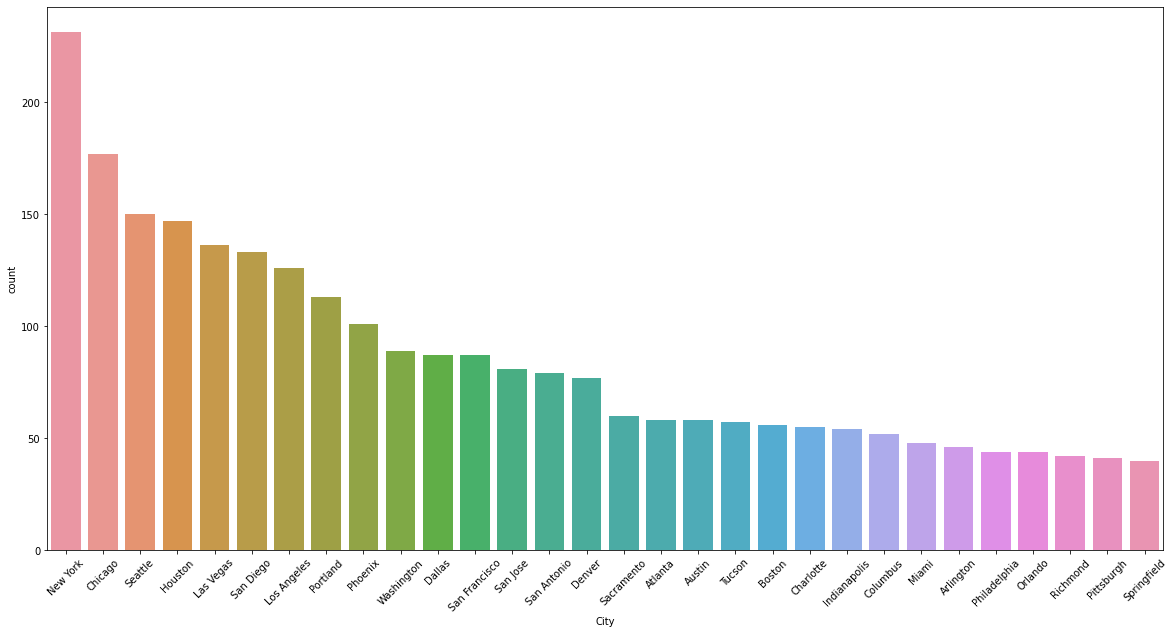

In [79]:
plt.figure(figsize=(20,10))

sns.countplot(x='City', order = df_cities['City'].value_counts().index, data=df_cities)
_ = plt.xticks(rotation=45)

The cities of **New York** (NY) and **Chicago** (Il) are the ones with the most Starbucks. Followed by **Seattle** (WA), **Houston** (TX) and then many cities of California, the most populated state.

## Scatter map

In [124]:
# Create a folium map, centered on United States
m = folium.Map(
    location=[37.6, -95.665],
    zoom_start=4
)

In [125]:
# Scatterplot all starbucks
_ = df.apply(lambda row: folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], radius=1, weight=3, color="#006241", fill_color="#006241").add_to(m), axis=1)

In [126]:
points = [
    [29, -100.665],
    [49, -100.665]
]

folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(m)

In [127]:
m

Based on previous observations, we can say that:
 - The city with the most Starbucks is **New York**, followed by Chicago and Seattle.
 - The state with the most Starbucks is **California**, with more than two time more store than the second state, Texas.
 
 The map seems to confirm these observations.

## East or west ? Map

**Which side of United States has the most Starbucks ? East or west ?**

A red line was drawed on the following map, east and weast point 